In [1]:
# more common imports
import pandas as pd
import numpy as np
from collections import Counter
import re
import os

# languange processing imports
import nltk
from gensim.corpora import Dictionary
# preprocessing imports
from sklearn.preprocessing import LabelEncoder

# model imports
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.word2vec import Word2Vec
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
# hyperparameter training imports
from sklearn.model_selection import GridSearchCV

# visualization imports
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import io
%matplotlib inline
sns.set()  # defines the style of the plots to be seaborn style

C:\Users\edufe\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
#Verifica os dados no diretorio

Data = os.listdir("../../Filter/Tweets_Filtered/")
for i in range(len(Data)):
    Data[i] = Data[i].split(".")[0]
    
Pessoas = ["realDonaldTrump", "jairbolsonaro", "hbredda", "gui_benchimol", "pedrocerize"]

NoticiasPolitica = ["OGloboPolitica", "folha_poder", "GloboNews", "EstadaoPolitica", 
                    "RevistaEpoca", "valoreconomico", "g1politica", "conexaopolitica", "EstadaoEconomia", 
                    "UOLEconomia", "folha_mercado", "g1economia", "OGlobo_Economia"]

Noticias = ["UOL", "folha", "g1", "VEJA", "cartacapital", "RevistaISTOE"]

#Monta um dicionario com todos datasets de twites de todas as pessoas
Alvo = NoticiasPolitica


AllData = pd.DataFrame()
for i in Alvo:
    if i in Data:
        MoreData = pd.read_csv("../../Filter/Tweets_Filtered/{0}".format(i+".csv"), sep=";", decimal=",", encoding='utf-16')
        AllData = pd.concat([AllData, MoreData])
    else:
        print("{0} não disponivel".format(i))
        
AllData = AllData.reset_index(drop=True)

In [3]:
label_encoder = LabelEncoder()

label_encoder.fit(AllData.Pessoa)
AllData['Pessoa_id'] = label_encoder.transform(AllData.Pessoa)

In [4]:
AllData.sample(5)

,Pessoa,Data,Texto,Retweets,Likes,URL,Pessoa_id
12701,RevistaEpoca,2019-04-22 18:28:54,bolsonaro e guedes tentam ajustar pela forma d...,5,22,1,5
23473,conexaopolitica,2019-02-19 15:25:47,mundo maduro permite que 300 toneladas de prod...,55,301,1,7
4435,folha_poder,2019-02-13 14:35:02,bolsonaro recebe alta 16 dias após a cirurgia ...,1,5,1,9
35348,g1economia,2019-04-24 11:02:21,dicas ir 2019 quem informa saída definitiva do...,0,4,1,10
11097,EstadaoPolitica,2018-10-30 21:37:55,convite de bolsonaro será objeto de ‘discussão...,4,33,1,1


In [5]:
document_lengths = np.array(list(map(len, AllData.Texto.str.split(' '))))

print("The average number of words in a document is: {}.".format(np.mean(document_lengths)))
print("The minimum number of words in a document is: {}.".format(min(document_lengths)))
print("The maximum number of words in a document is: {}.".format(max(document_lengths)))

The average number of words in a document is: 13.991752676762806.
The minimum number of words in a document is: 2.
The maximum number of words in a document is: 30.


In [6]:
for i in Alvo:
    List = AllData.loc[AllData['Pessoa'] == i]["Texto"]
    thisdocument_length = np.array(list(map(len, List.str.split(' '))))
    print(i)
    print("The average number of words in a document is: {}.".format(np.mean(thisdocument_length)))

OGloboPolitica
The average number of words in a document is: 14.5103125.
folha_poder
The average number of words in a document is: 12.9371875.
GloboNews
The average number of words in a document is: 18.655809583463828.
EstadaoPolitica
The average number of words in a document is: 13.33808752025932.
RevistaEpoca
The average number of words in a document is: 17.755242566510173.
valoreconomico
The average number of words in a document is: 10.800437910541133.
g1politica
The average number of words in a document is: 14.255625.
conexaopolitica
The average number of words in a document is: 15.480775242263208.
EstadaoEconomia
The average number of words in a document is: 12.90625.
UOLEconomia
The average number of words in a document is: 13.0296875.
folha_mercado
The average number of words in a document is: 12.475625.
g1economia
The average number of words in a document is: 13.25.
OGlobo_Economia
The average number of words in a document is: 12.487339793685527.


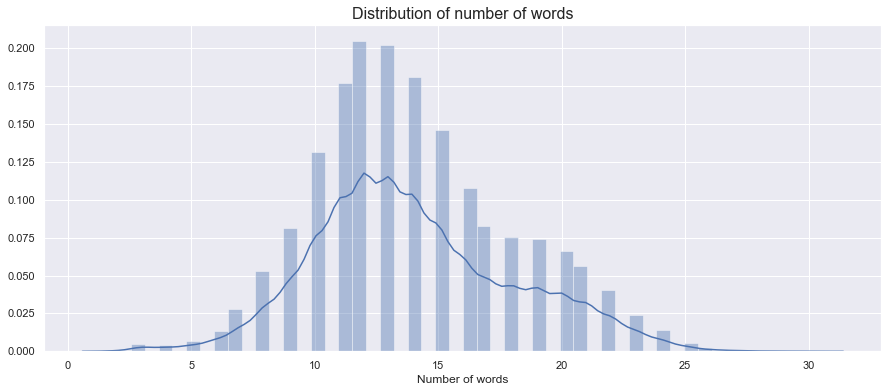

In [7]:
fig, ax = plt.subplots(figsize=(15,6))

ax.set_title("Distribution of number of words", fontsize=16)
ax.set_xlabel("Number of words")
sns.distplot(document_lengths, bins=50, ax=ax);

In [8]:
AllData[document_lengths <= 5]

,Pessoa,Data,Texto,Retweets,Likes,URL,Pessoa_id
568,OGloboPolitica,2019-03-23 10:37:17,bom dia pessoal,2,68,0,3
1043,OGloboPolitica,2019-02-24 10:50:27,bom dia pessoal,1,98,0,3
1119,OGloboPolitica,2019-02-19 21:35:00,laurojardim,1,1,1,3
1188,OGloboPolitica,2019-02-17 14:10:31,ascânio seleme pai permissivo,6,21,1,3
1208,OGloboPolitica,2019-02-16 09:34:18,bom dia pessoal,1,41,0,3
1721,OGloboPolitica,2019-01-30 13:57:24,a cirurgia de picciani,0,4,1,3
1865,OGloboPolitica,2019-01-27 09:29:58,bom dia pessoal,0,19,0,3
1965,OGloboPolitica,2019-01-24 09:20:52,bom dia pessoal,1,20,0,3
2063,OGloboPolitica,2019-01-20 09:57:42,bom dia pessoal,2,21,0,3
2074,OGloboPolitica,2019-01-19 09:43:23,bom dia pessoal,1,33,0,3


In [9]:
#Baixa alguns modulos do NLKT

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Transforma o documento em sentenças
def Data_Tokenizer(df):
    """ All the preprocessing steps for word2vec are done in this function.
    All mutations are done on the dataframe itself. So this function returns
    nothing.
    """
    df['document_sentences'] = df.Texto.str.split('.')  # split texts into individual sentences
    df['tokenized_sentences'] = list(map(lambda sentences:
                                         list(map(nltk.word_tokenize, sentences)),
                                         df.document_sentences))  # tokenize sentences
    df['tokenized_sentences'] = list(map(lambda sentences:
                                         list(sentences),
                                         df.tokenized_sentences))  # remove unwanted characters
    df['tokenized_sentences'] = list(map(lambda sentences:
                                         list(filter(lambda lst: lst, sentences)),
                                         df.tokenized_sentences))  # remove empty lists

Data_Tokenizer(AllData)

def lda_get_good_tokens(df):
    df['tokenized_text'] = list(map(nltk.word_tokenize, df.Texto))
    df['tokenized_text'] = list(df.tokenized_text)

lda_get_good_tokens(AllData)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\edufe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\edufe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\edufe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
tokenized_only_dict = Counter(np.concatenate(AllData.tokenized_text.values))

tokenized_only_df = pd.DataFrame.from_dict(tokenized_only_dict, orient='index')
tokenized_only_df.rename(columns={0: 'count'}, inplace=True)

tokenized_only_df.sort_values('count', ascending=False, inplace=True)

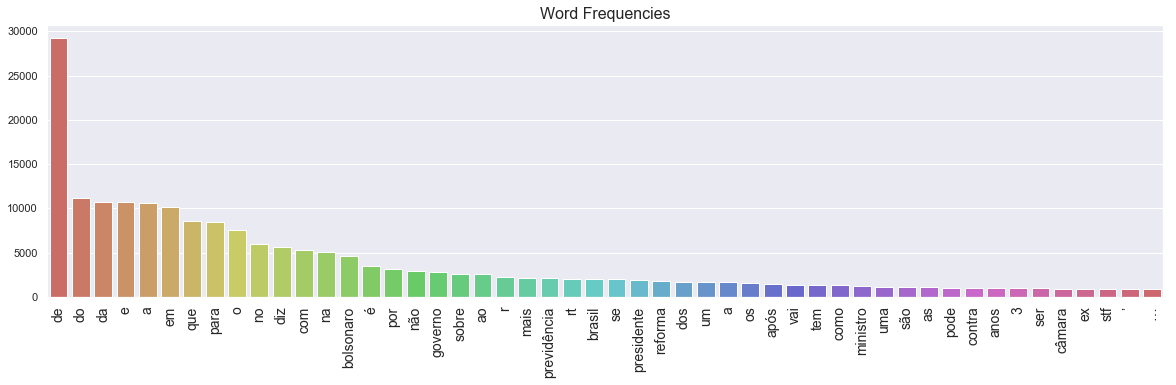

In [11]:
def word_frequency_barplot(df, nr_top_words=50):
    """ df should have a column named count.
    """
    fig, ax = plt.subplots(1,1,figsize=(20,5))

    sns.barplot(list(range(nr_top_words)), df['count'].values[:nr_top_words], palette='hls', ax=ax)

    ax.set_xticks(list(range(nr_top_words)))
    ax.set_xticklabels(df.index[:nr_top_words], fontsize=14, rotation=90)
    return ax
    
ax = word_frequency_barplot(tokenized_only_df)
ax.set_title("Word Frequencies", fontsize=16);

In [19]:
print(nltk.corpus.stopwords.words('portuguese')[0:20])

['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as']


In [13]:
def remove_stopwords(df):
    """ Removes stopwords based on a known set of stopwords
    available in the nltk package. In addition, we include our
    made up word in here.
    """
    # Luckily nltk already has a set of stopwords that we can remove from the texts.
    stopwords = nltk.corpus.stopwords.words('portuguese')[0:20]
    
    del(stopwords[stopwords.index("não")])
    ManualStop = ["istoégente", "expressoepoca", "globonews", "estudioi", "rt", "andreiasadi",
                  "’", "‘", "”", "“", "r", ",", ".", "…", "diz", "à", "ao"]
    Numbers = list(range(10))
    stopwords = stopwords + ManualStop + Numbers
    
    df['stopwords_removed'] = list(map(lambda doc:
                                       [word for word in doc if word not in stopwords],
                                       df['tokenized_text']))

remove_stopwords(AllData)

dictionary = Dictionary(documents=AllData.stopwords_removed.values)

print("Found {} words.".format(len(dictionary.values())))

dictionary.filter_extremes(no_above=0.8, no_below=3)

dictionary.compactify()  # Reindexes the remaining words after filtering
print("Left with {} words.".format(len(dictionary.values())))

Found 29646 words.
Left with 12068 words.


In [14]:
def document_to_bow(df):
    df['bow'] = list(map(lambda doc: dictionary.doc2bow(doc), df.stopwords_removed))
    
document_to_bow(AllData)

In [15]:
cleansed_words_df = pd.DataFrame.from_dict(dictionary.token2id, orient='index')
cleansed_words_df.rename(columns={0: 'id'}, inplace=True)

cleansed_words_df['count'] = list(map(lambda id_: dictionary.dfs.get(id_), cleansed_words_df.id))
del cleansed_words_df['id']

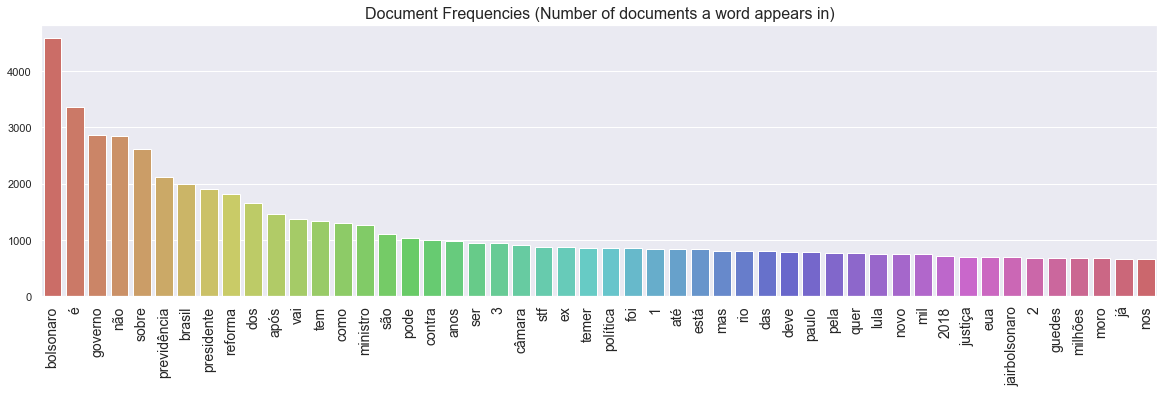

In [16]:
cleansed_words_df.sort_values('count', ascending=False, inplace=True)
ax = word_frequency_barplot(cleansed_words_df)
ax.set_title("Document Frequencies (Number of documents a word appears in)", fontsize=16); 

In [17]:
Pessoas_words = []
for i in Alvo:
    Pessoas_words.append(list(np.concatenate(AllData.loc[AllData.Pessoa == i, 'stopwords_removed'].values)))

Pessoas_word_freqeuncies = []
for i in range(len(Alvo)):
    Pessoas_word_freqeuncies.append({word: Pessoas_words[i].count(word) for word in cleansed_words_df.index[:50]})

frequencies_df = pd.DataFrame(index=cleansed_words_df.index[:50])

for i in range(len(Alvo)):
    frequencies_df[Alvo[i]] = list(map(lambda word: Pessoas_word_freqeuncies[i][word], frequencies_df.index))
    
keys = list(frequencies_df.keys())

for i in range(len(Alvo)-1):
    frequencies_df[keys[i+1]] = frequencies_df[keys[i]] + frequencies_df[keys[i+1]]

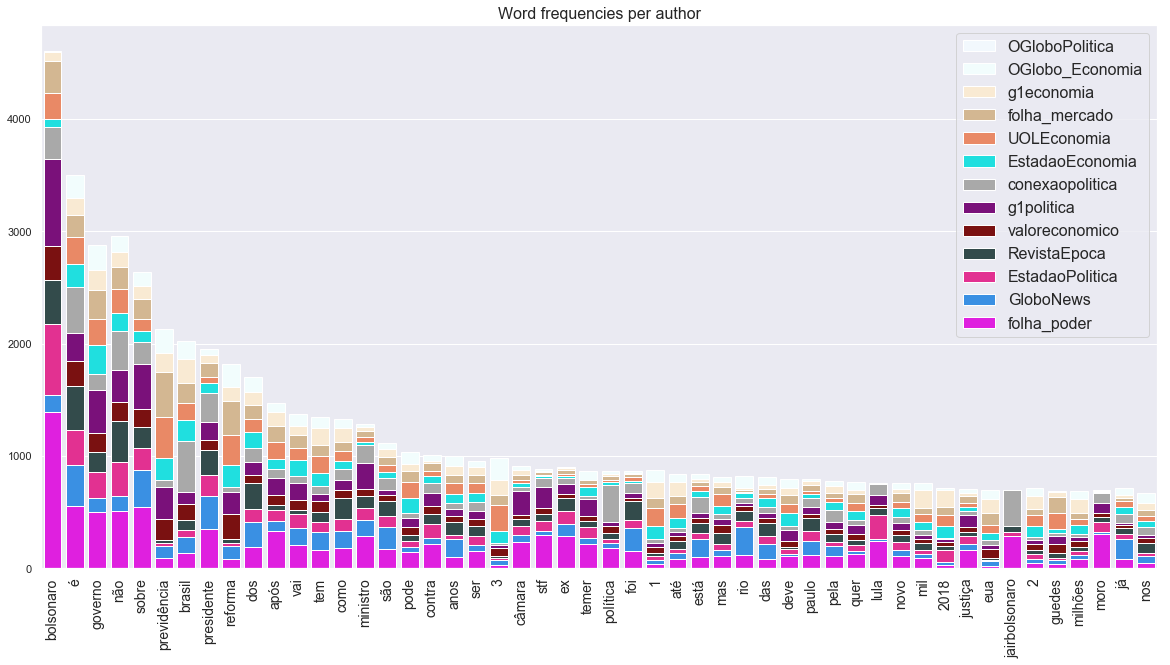

In [18]:
from matplotlib import colors
AllColors = list(colors.cnames.keys())
UsedColors = []
for i in range(len(AllColors)):
    if i%4 == 0:
        UsedColors.append(AllColors[i])

fig, ax = plt.subplots(1,1,figsize=(20,10))

nr_top_words = len(frequencies_df)
nrs = list(range(nr_top_words))

for i in range(len(Alvo)):
    sns.barplot(nrs, frequencies_df[Alvo[-i]].values, ax=ax, label=Alvo[-i], color=UsedColors[i])

ax.set_title("Word frequencies per author", fontsize=16)
ax.legend(prop={'size': 16})
ax.set_xticks(nrs)
ax.set_xticklabels(frequencies_df.index, fontsize=14, rotation=90);